In [164]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()


In [165]:
df = pd.read_csv('/Users/sov11/Desktop/datasets/calculating_stock_returns/data/fb_price.csv')
df = df.set_index('Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...
2017-12-22,177.139999,177.529999,176.229996,177.199997,177.199997,8487000
2017-12-26,176.630005,177.000000,174.669998,175.990005,175.990005,8897300
2017-12-27,176.550003,178.440002,176.259995,177.619995,177.619995,9496100


In [166]:
df2 = df[['Close','Adj Close']]
df2

,Close,Adj Close
Date,,
2012-05-18,38.230000,38.230000
2012-05-21,34.029999,34.029999
2012-05-22,31.000000,31.000000
2012-05-23,32.000000,32.000000
2012-05-24,33.029999,33.029999
...,...,...
2017-12-22,177.199997,177.199997
2017-12-26,175.990005,175.990005
2017-12-27,177.619995,177.619995


In [167]:
df2.rename(columns={'Close':'Close', 'Adj Close':'Price_t'}, inplace='True')
df2.head()

/var/folders/lj/kw7skqr94xn2j__vgtn7xwgw0000gp/T/ipykernel_2338/4166352182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={'Close':'Close', 'Adj Close':'Price_t'}, inplace='True')


,Close,Price_t
Date,,
2012-05-18,38.230000,38.230000
2012-05-21,34.029999,34.029999
2012-05-22,31.000000,31.000000
2012-05-23,32.000000,32.000000
2012-05-24,33.029999,33.029999


In [168]:
df2['price_t-1'] = df2['Price_t'].shift(1)
df2

/var/folders/lj/kw7skqr94xn2j__vgtn7xwgw0000gp/T/ipykernel_2338/3212856854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price_t-1'] = df2['Price_t'].shift(1)


,Close,Price_t,price_t-1
Date,,,
2012-05-18,38.230000,38.230000,NaN
2012-05-21,34.029999,34.029999,38.230000
2012-05-22,31.000000,31.000000,34.029999
2012-05-23,32.000000,32.000000,31.000000
2012-05-24,33.029999,33.029999,32.000000
...,...,...,...
2017-12-22,177.199997,177.199997,177.449997
2017-12-26,175.990005,175.990005,177.199997
2017-12-27,177.619995,177.619995,175.990005


In [169]:
df3 = df2.drop('Close', axis=1)
df3

,Price_t,price_t-1
Date,,
2012-05-18,38.230000,NaN
2012-05-21,34.029999,38.230000
2012-05-22,31.000000,34.029999
2012-05-23,32.000000,31.000000
2012-05-24,33.029999,32.000000
...,...,...
2017-12-22,177.199997,177.449997
2017-12-26,175.990005,177.199997
2017-12-27,177.619995,175.990005


In [170]:
df3['returns_manual'] = (df3['Price_t'] / df3['price_t-1'])-1
df3

,Price_t,price_t-1,returns_manual
Date,,,
2012-05-18,38.230000,NaN,NaN
2012-05-21,34.029999,38.230000,-0.109861
2012-05-22,31.000000,34.029999,-0.089039
2012-05-23,32.000000,31.000000,0.032258
2012-05-24,33.029999,32.000000,0.032187
...,...,...,...
2017-12-22,177.199997,177.449997,-0.001409
2017-12-26,175.990005,177.199997,-0.006828
2017-12-27,177.619995,175.990005,0.009262


In [171]:
df3['returns_change'] = df3['Price_t'].pct_change(1)
df3

,Price_t,price_t-1,returns_manual,returns_change
Date,,,,
2012-05-18,38.230000,NaN,NaN,NaN
2012-05-21,34.029999,38.230000,-0.109861,-0.109861
2012-05-22,31.000000,34.029999,-0.089039,-0.089039
2012-05-23,32.000000,31.000000,0.032258,0.032258
2012-05-24,33.029999,32.000000,0.032187,0.032187
...,...,...,...,...
2017-12-22,177.199997,177.449997,-0.001409,-0.001409
2017-12-26,175.990005,177.199997,-0.006828,-0.006828
2017-12-27,177.619995,175.990005,0.009262,0.009262


In [172]:

df3.tail()

,Price_t,price_t-1,returns_manual,returns_change
Date,,,,
2017-12-22,177.199997,177.449997,-0.001409,-0.001409
2017-12-26,175.990005,177.199997,-0.006828,-0.006828
2017-12-27,177.619995,175.990005,0.009262,0.009262
2017-12-28,177.919998,177.619995,0.001689,0.001689
2017-12-29,176.460007,177.919998,-0.008206,-0.008206


In [173]:
df3.drop(['returns_manual'], axis=1, inplace=True)
df3

,Price_t,price_t-1,returns_change
Date,,,
2012-05-18,38.230000,NaN,NaN
2012-05-21,34.029999,38.230000,-0.109861
2012-05-22,31.000000,34.029999,-0.089039
2012-05-23,32.000000,31.000000,0.032258
2012-05-24,33.029999,32.000000,0.032187
...,...,...,...
2017-12-22,177.199997,177.449997,-0.001409
2017-12-26,175.990005,177.199997,-0.006828
2017-12-27,177.619995,175.990005,0.009262


In [174]:
df3['price_t-1'].isnull().sum()


1

<AxesSubplot:xlabel='Date'>

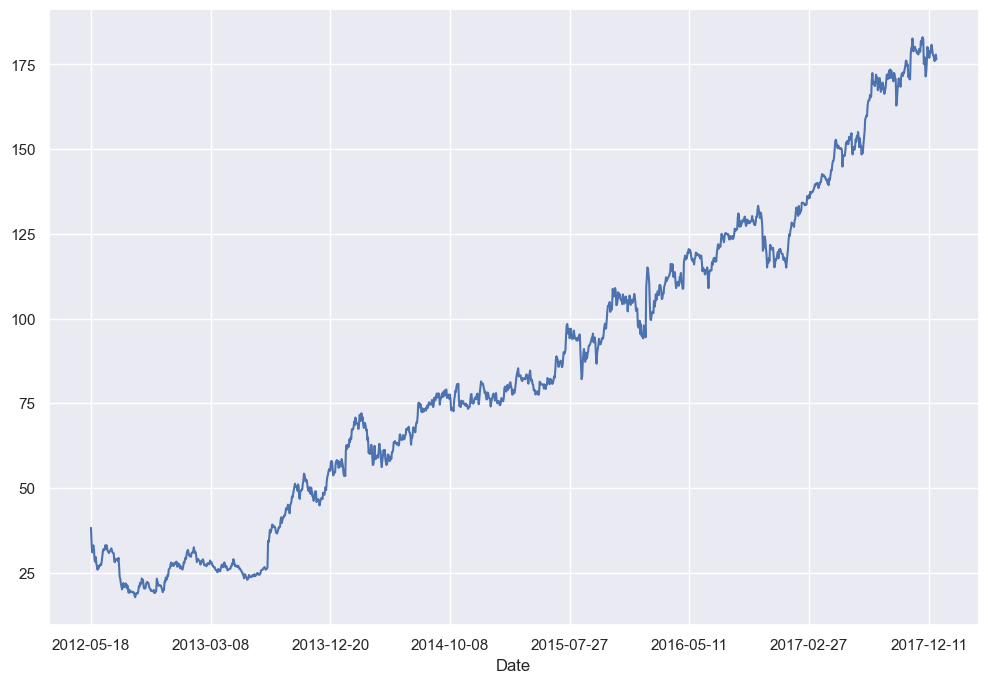

In [175]:
df3['Price_t'].plot(figsize = (12,8))

<AxesSubplot:xlabel='Date'>

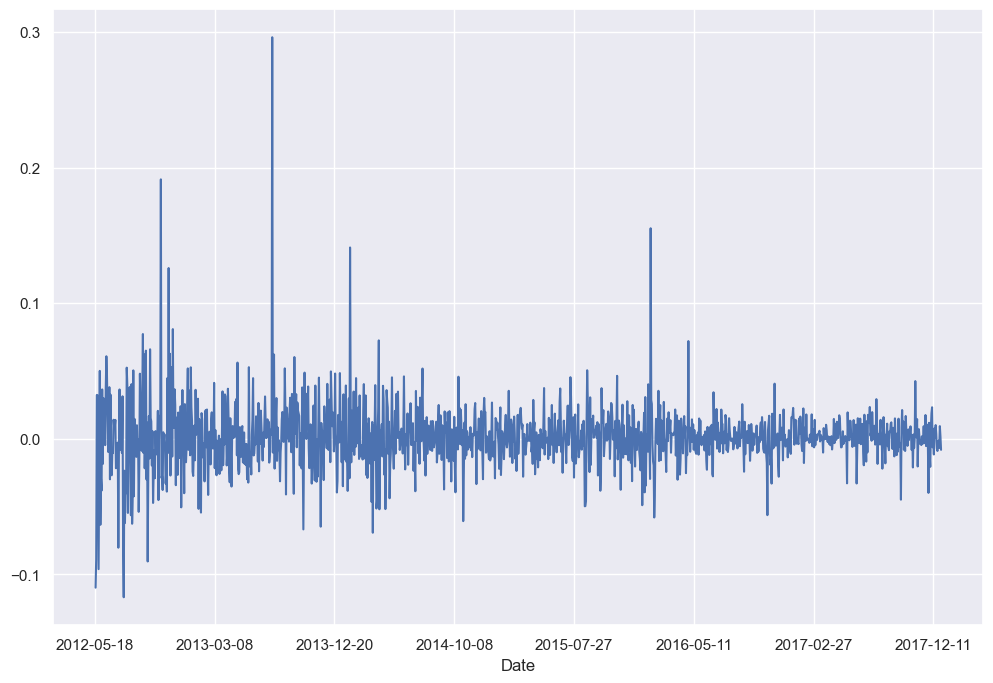

In [176]:
df3['returns_change'].plot(figsize=(12,8))

In [177]:
#def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
 #   df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
  #  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
   #                 df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    #df = df.iloc[:, [0, 1, 3]]
    #df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    #f['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    #df['n_good'] = df['prop_good'] * df['n_obs']
    #df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    #df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    #df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    #df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    #df['diff_prop_good'] = df['prop_good'].diff().abs()
    #df['diff_WoE'] = df['WoE'].diff().abs()
    #df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    #df['IV'] = df['IV'].sum()
    #return df#

In [178]:
data = pd.read_excel('/Users/sov11/Desktop/datasets/Book4.xlsx')
data = data.set_index('Date')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1260 entries, Feb 08, 2023 to Feb 09, 2018
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         1260 non-null   float64
 1   High         1260 non-null   float64
 2   Low          1260 non-null   float64
 3   Close*       1260 non-null   float64
 4   Adj Close**  1260 non-null   float64
 5   Volume       1260 non-null   object 
dtypes: float64(5), object(1)
memory usage: 68.9+ KB


In [179]:
def stock_plot(df4):
    data.drop(columns=['Open','High','Low','Volume'], axis=1, inplace=True)
    data.rename(columns={'Close*':'Close', 'Adj Close**':'Price_t'}, inplace='True')
    data['price_t-1'] = df4['Price_t'].shift(1)
    data['returns_change'] = df4['Price_t'].pct_change(1)

    return df4


In [180]:
stock_plot(data)

,Close,Price_t,price_t-1,returns_change
Date,,,,
"Feb 08, 2023",1877.4,1877.4,NaN,NaN
"Feb 07, 2023",1871.7,1871.7,1877.4,-0.003036
"Feb 06, 2023",1866.2,1866.2,1871.7,-0.002939
"Feb 03, 2023",1862.9,1862.9,1866.2,-0.001768
"Feb 02, 2023",1916.3,1916.3,1862.9,0.028665
...,...,...,...,...
"Feb 15, 2018",1352.1,1352.1,1353.2,-0.000813
"Feb 14, 2018",1355.5,1355.5,1352.1,0.002515
"Feb 13, 2018",1328.1,1328.1,1355.5,-0.020214


In [181]:
data.sort_index(ascending=True, inplace=True)


In [182]:
data

,Close,Price_t,price_t-1,returns_change
Date,,,,
"Apr 01, 2018",1342.1,1342.1,1332.8,0.006978
"Apr 01, 2019",1290.0,1290.0,1289.9,0.000078
"Apr 01, 2020",1625.7,1625.7,1633.7,-0.004897
"Apr 02, 2018",1332.8,1332.8,1335.8,-0.002246
"Apr 02, 2019",1289.9,1289.9,1289.0,0.000698
...,...,...,...,...
"Sep 29, 2022",1662.4,1662.4,1692.9,-0.018016
"Sep 30, 2018",1187.1,1187.1,1202.4,-0.012725
"Sep 30, 2019",1482.0,1482.0,1501.0,-0.012658


In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1260 entries, Apr 01, 2018 to Sep 30, 2021
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           1260 non-null   float64
 1   Price_t         1260 non-null   float64
 2   price_t-1       1259 non-null   float64
 3   returns_change  1259 non-null   float64
dtypes: float64(4)
memory usage: 49.2+ KB


<AxesSubplot:xlabel='Date'>

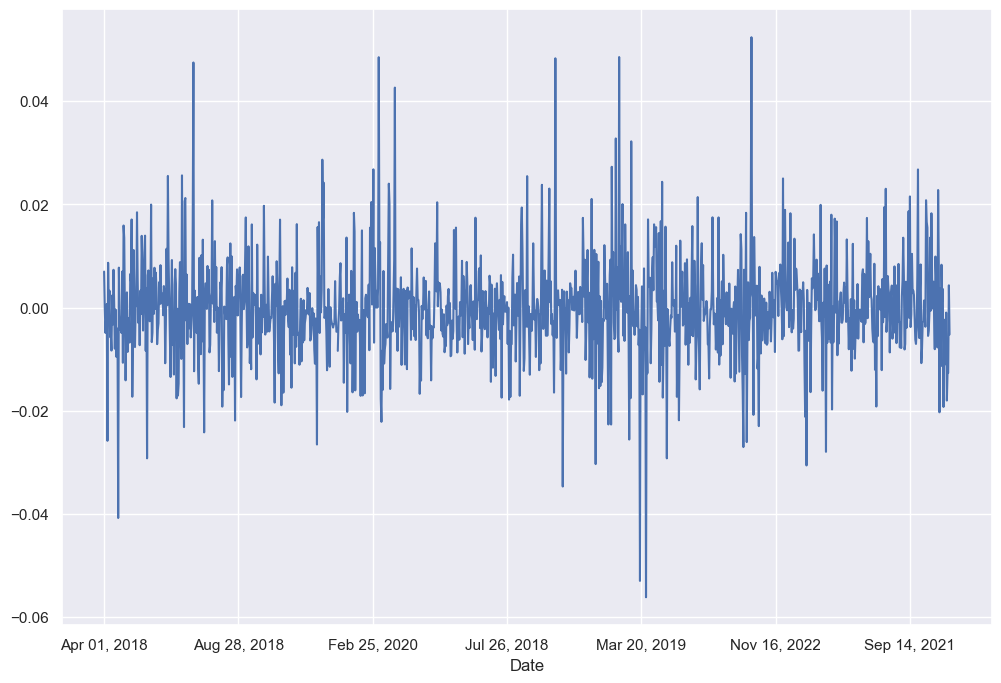

In [184]:
data['returns_change'].plot(figsize = (12,8))